# **Homework 18: Quantum Error Correction**
---

### **Description**
In this week's homework, you will implement a phase flip error correcting code.

<br>

### **Structure**
**Part 1**: [Phase Flip Code](#p1)



<br>

### **Learning Objectives**
By the end of this homework, you will:
* Recognize how to implement a bit flip code using cirq.
* Recognize how to test an error correcting code using cirq generally and with noise models.

<br>

### **Resources**
* [Noisy Simulations Cheat Sheet
](https://docs.google.com/document/d/1Ex2m3dp5-_z8XN8EiBv6PUptHWrTLDpsKYU662oTy4A/edit#heading=h.exb19quwqzr9)

* [Cirq Cheat Sheet](https://docs.google.com/document/d/1j0vEwtS6fK-tD1DWAPry4tJdxEiq8fwMtXuYNGRhK_M)

<br>

**Before starting, run the code below to import all necessary functions and libraries.**


In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

def binary_labels(num_qubits):
    return [bin(x)[2:].zfill(num_qubits) for x in range(2 ** num_qubits)]
plt.rcParams.update({'font.size': 8})

try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install cirq --quiet
    import cirq
    print("installed cirq.")

installing cirq...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.8/598.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 969.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.8/223.8 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.9 MB/s eta 0:00:00
     ━

<a name = "p1"></a>

---
## **Part 1: Phase Flip Code**
---

In this section, you will implement and explore a 3-qubit phase flip error correcting code. This is very similar to the bit flip code we explored in lab, but dealing with sign flips instead of bit flips.

<br>

For example, noise could cause $\frac{1}{\sqrt 2}(|0\rangle + |1\rangle)$ to switch to $\frac{1}{\sqrt 2}(|0\rangle - |1\rangle)$. In other words, a phase flip error can cause the $|+\rangle$ state to turn into $|-\rangle$ and vice-versa.

#### **Step #1: Encoding**

Create a 3-qubit phase flip encoded quantum circuit. Specifically,
1. Initialize a circuit with 3 qubits and 1 classical bit.

2. Entangle the state of $q_0$ with the other qubits.

3. Put all qubits in equal superpositions to correct $|+\rangle$ and $|-\rangle$ states from switching instead of $|0\rangle$ and $|1\rangle$.

**NOTE**: The first two steps are identical to what we do for the bit flip code.

##### **1. Initialize a circuit with 3 qubits and 1 classical bit.**

In [ ]:
qubits = # COMPLETE THIS CODE
encode_circuit = # COMPLETE THIS CODE

###### **Solution**

In [ ]:
qubits = cirq.NamedQubit.range(3, prefix = 'q')
encode_circuit = cirq.Circuit()

##### **2. Entangle the state of $q_0$ with the other two qubits.**

This can be accomplished by applying two CNOT gates controlled by $q_0$ and targeting the other qubits, $q_1$ and $q_2$.

In [ ]:
encode_circuit.# COMPLETE THIS CODE
encode_circuit.# COMPLETE THIS CODE

encode_circuit

###### **Solution**

In [ ]:
encode_circuit.append(cirq.CNOT(qubits[0], qubits[1]))
encode_circuit.append(cirq.CNOT(qubits[0], qubits[2]))

encode_circuit

q0: ───@───@───
       │   │
q1: ───X───┼───
           │
q2: ───────X───

##### **3. Put all qubits in equal superpositions to correct $|+\rangle$ and $|-\rangle$ states from flipping instead of $|0\rangle$ and $|1\rangle$.**

In [ ]:
# COMPLETE THIS CODE

###### **Solution**

In [ ]:
encode_circuit.append(cirq.H.on_each(qubits))

encode_circuit

┌──┐
q0: ───@────@─────H───
       │    │
q1: ───X────┼H────────
            │
q2: ────────X─────H───
           └──┘

#### **Step #2: Sending Over Noisy Channel**

Simulate a phase flip error on $q_0$. **Hint**: What gate flips a qubit from $|+\rangle$ to $|-\rangle$?

In [ ]:
noisy_channel_circuit = # COMPLETE THIS CODE

noisy_channel_circuit.# COMPLETE THIS CODE

noisy_channel_circuit

##### **Solution**

In [ ]:
noisy_channel_circuit = cirq.Circuit()

noisy_channel_circuit.append(cirq.Z(qubits[0]))

noisy_channel_circuit

q0: ───Z───

#### **Step #3: Error Detection**

Next, we will detect if there's been an error by checking the *phase* (do the phases agree with each other or are they diffent?) of $q_0$ with the other qubits by *bringing all the qubits out of superposition* (H gates) and then checking the parity of the $q_0$ with the ancilla qubits by applying two CNOTs controlled by $q_0$ and targeting the ancilla qubits.

**NOTE**: Only the part dealing with superposition is different from the bit flip code.

In [ ]:
detection_circuit = # COMPLETE THIS CODE

detection_circuit.# COMPLETE THIS CODE
detection_circuit.# COMPLETE THIS CODE

detection_circuit

##### **Solution**

In [ ]:
detection_circuit = cirq.Circuit()

detection_circuit.append(cirq.H.on_each(qubits))

detection_circuit.append(cirq.CNOT(qubits[0], qubits[1]))
detection_circuit.append(cirq.CNOT(qubits[0], qubits[2]))

detection_circuit

q0: ───H───@───@───
           │   │
q1: ───H───X───┼───
               │
q2: ───H───────X───

#### **Step #4: Error Correction**

We will now create a circuit to update $q_0$ if both $q_1$ and $q_2$ have detected a bit flip so that $q_0$ stores the correct logical state. Specifically, apply the Toffoli (CCX) gate controlled by $q_2$ and $q_1$, targeting $q_0$.

In [ ]:
correction_circuit = # COMPLETE THIS CODE

correction_circuit.# COMPLETE THIS CODE

correction_circuit

##### **Solution**

In [ ]:
correction_circuit = cirq.Circuit()

correction_circuit.append(cirq.CCNOT(qubits[2], qubits[1], qubits[0]))

correction_circuit

q0: ───X───
       │
q1: ───@───
       │
q2: ───@───

#### **Step #5: Decoding**

Lastly, the logical state has been stored in $q_0$, so we will
create a decoding circuit to measure this qubit in order to decode the final logical state.

In [ ]:
decode_circuit = # COMPLETE THIS CODE

decode_circuit.# COMPLETE THIS CODE

decode_circuit

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
decode_circuit = cirq.Circuit()

decode_circuit.append(cirq.measure(qubits[0]))

decode_circuit

q0: ───M───

#### **Problem #1.1**

Now, let's simulate the results of performing each of these steps by adding the circuits together and simulating 100 times (to ensure our error correction code really works).

<br>

**Before looking at the result, let's ask ourselves: what state should we expect to measure?**

In [ ]:
phaseflip_circuit = encode_circuit + # COMPLETE THIS CODE

# COMPLETE THIS CODE


hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))

plt.show()

##### **Solution**

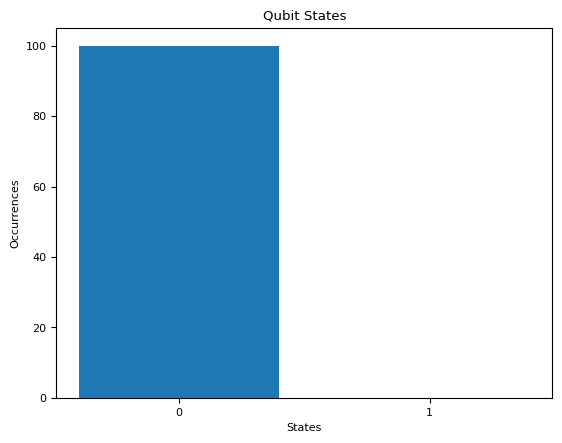

In [ ]:
phaseflip_circuit = encode_circuit + noisy_channel_circuit + detection_circuit + correction_circuit + decode_circuit

sim = cirq.Simulator()
result = sim.run(phaseflip_circuit, repetitions = 100)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))

plt.show()

#### **Problem #1.2**

Use your code from above so that the logical qubit is in the $|+\rangle$ state instead of the $|0\rangle$ state.

<br>

**NOTE**: There are several ways to accomplish this, but the traditional way is to apply a *logical gate* to all *physical qubits* after encoding.

In [ ]:
# PREPARATION
prepare_circuit = # COMPLETE THIS CODE

# SIMULATING
phaseflip_circuit = prepare_circuit + encode_circuit + noisy_channel_circuit + detection_circuit + correction_circuit + decode_circuit

sim = cirq.Simulator()
result = sim.run(phaseflip_circuit, repetitions = 100)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))

plt.show()

##### **Solution**

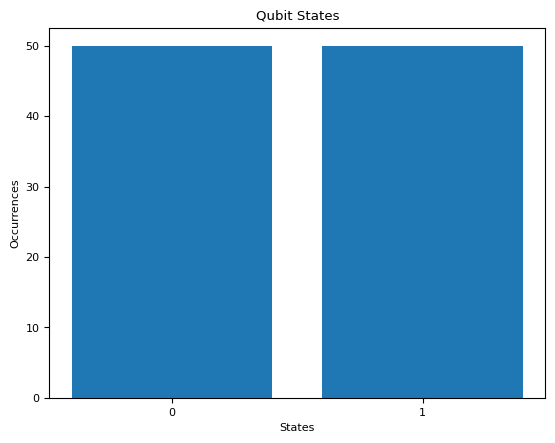

In [ ]:
# PREPARATION
prepare_circuit = cirq.Circuit()
prepare_circuit.append(cirq.H(qubits[0]))

# SIMULATING
phaseflip_circuit = prepare_circuit + encode_circuit + noisy_channel_circuit + detection_circuit + correction_circuit + decode_circuit

sim = cirq.Simulator()
result = sim.run(phaseflip_circuit, repetitions = 100)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))

plt.show()

#### **Problem #1.3**

You hopefully saw a mix of 0s and 1s indicating a roughly equal superposition. However, it's hard to tell if this is $|+\rangle$ or if it's incurred an error and is now $|-\rangle$ or even a different superposition.

<br>

Add a gate to $q_0$ right before decoding to rotate it's state into the computational basis so that we can be sure if the error has been corrected. **Hint**: Assuming $q_0$ is in $|+\rangle$ state, what gate can we apply so that it ends up as $|0\rangle$?

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

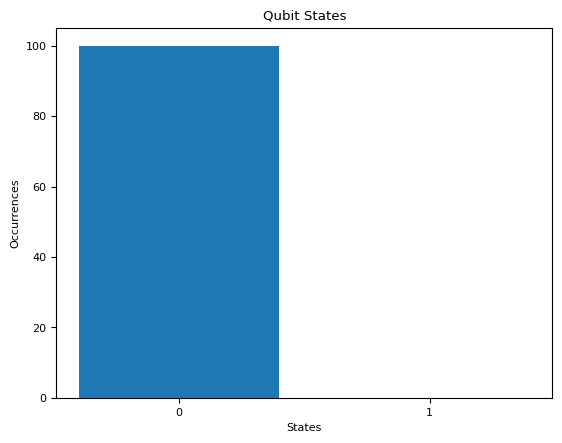

In [ ]:
# PREPARATION
prepare_circuit = cirq.Circuit()
prepare_circuit.append(cirq.H(qubits[0]))


# SIMULATING
phaseflip_circuit = prepare_circuit + encode_circuit + noisy_channel_circuit + detection_circuit + correction_circuit + cirq.H(qubits[0]) + decode_circuit

sim = cirq.Simulator()
result = sim.run(phaseflip_circuit, repetitions = 100)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))

plt.show()

#### **Problem #1.4**

Modify the code so that the logical qubit is in the $|+\rangle$ state, but there is a phase flip error on $q_1$ instead of $q_0$.

<br>

**Does our code still work?**

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

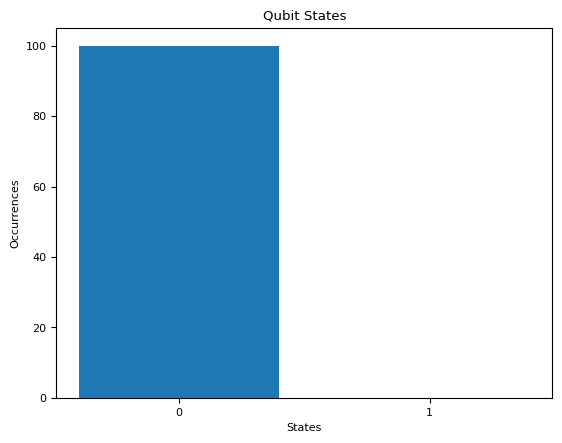

In [ ]:
# PREPARATION
prepare_circuit = cirq.Circuit()
prepare_circuit.append(cirq.H(qubits[0]))


# NOISY CHANNEL
noisy_channel_circuit = cirq.Circuit()
noisy_channel_circuit.append(cirq.Z(qubits[1]))


# SIMULATING
phaseflip_circuit = prepare_circuit + encode_circuit + noisy_channel_circuit + detection_circuit + correction_circuit + cirq.H(qubits[0]) + decode_circuit

sim = cirq.Simulator()
result = sim.run(phaseflip_circuit, repetitions = 100)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))

plt.show()

#### **Problem #1.5**

Modify the code so that the logical qubit is in the $|0\rangle$ state, but there is a phase flip error on *both* $q_1$ and $q_2$.

<br>

**Does our code still work?**

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

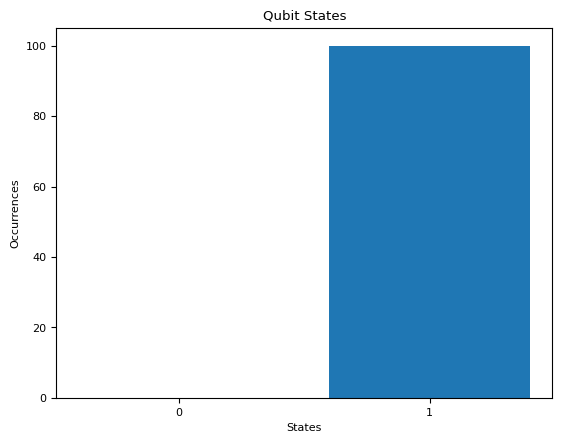

In [ ]:
# PREPARATION
prepare_circuit = cirq.Circuit()
prepare_circuit.append(cirq.I(qubits[0]))


# NOISY CHANNEL
noisy_channel_circuit = cirq.Circuit()
noisy_channel_circuit.append(cirq.Z.on_each(qubits[0], qubits[1]))


# SIMULATING
phaseflip_circuit = prepare_circuit + encode_circuit + noisy_channel_circuit + detection_circuit + correction_circuit + decode_circuit

sim = cirq.Simulator()
result = sim.run(phaseflip_circuit, repetitions = 100)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))

plt.show()

### **Followup Activities**

To further hone your understanding of the bit flip code, consider trying the following activities:
* Remove parts of the circuit such as the parity checks or error correcting Toffoli to see what happens and understand their role better.
* Alter this code to correct for an error on a different qubit.
* Expand this 3 qubit error correcting code to a 4+ qubit error correcting code. Can these sustain more errors than the one above? Are there patterns to how many errors an *n* qubit code can handle?

#End of notebook
---
© 2024 The Coding School, All rights reserved